# Import Required Libraries

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

from dateutil import parser

from numpy import absolute
from numpy import mean
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor

# Read Data

In [2]:
df = pd.ExcelFile('Data.xlsx')

In [3]:
plants = pd.read_excel(df, 'plants')

plants  = plants.rename(columns = {'Batch Number': 'batch_number', 
                                   'Plant Date': 'plant_date', 
                                   'Class': 'class',
                                   'Fresh Weight (g)': 'fresh_weight', 
                                   'Head Weight (g)': 'head_weight',
                                   'Radial Diameter (mm)': 'radial_diameter', 
                                   'Polar Diameter (mm)': 'polar_diameter',
                                   'Diameter Ratio': 'diameter_ratio', 
                                   'Leaves': 'leaves',
                                   'Density (kg/L)': 'density',
                                   'Leaf Area (cm^2)': 'leaf_area',
                                   'Square ID': 'square_id',
                                   'Check Date': 'check_date', 
                                   'Flight Date': 'flight_date',
                                   'Remove': 'remove'})

print(plants)

      batch_number plant_date  class  fresh_weight  head_weight  \
0              402 2020-04-11      3          15.0          NaN   
1              402 2020-04-11      4          15.0          NaN   
2              402 2020-04-11      1          16.0          NaN   
3              402 2020-04-11      3          15.0          NaN   
4              402 2020-04-11      3          15.0          NaN   
...            ...        ...    ...           ...          ...   
4854           738 2020-08-27      4         284.0         12.0   
4855           738 2020-08-27      5         199.0          8.0   
4856           738 2020-08-27      3         280.0         23.0   
4857           738 2020-08-27      4         247.0         10.0   
4858           738 2020-08-27      2         183.0         18.0   

      radial_diameter  polar_diameter  diameter_ratio  leaves  density  \
0                 NaN             NaN             NaN    10.0      NaN   
1                 NaN             NaN          

In [4]:
planting = pd.read_excel(df, 'planting')

print(planting)

      Crop  Column2  Column3 Plant_Date  Column1  Region  Column4  \
0        3      NaN      NaN 2020-02-06      NaN       0      NaN   
1        3      NaN      NaN 2020-02-07      NaN       0      NaN   
2        3      NaN      NaN 2020-02-07      NaN       0      NaN   
3        3      NaN      NaN 2020-02-08      NaN       0      NaN   
4        3      NaN      NaN 2020-02-10      NaN       0      NaN   
...    ...      ...      ...        ...      ...     ...      ...   
1816     1      NaN      NaN 2020-08-12      NaN       1      NaN   
1817     1      NaN      NaN 2020-08-21      NaN       1      NaN   
1818     1      NaN      NaN 2020-08-25      NaN       1      NaN   
1819     1      NaN      NaN 2020-08-27      NaN       1      NaN   
1820     0      NaN      NaN 2020-06-24      NaN       1      NaN   

      Planting_Batch  Volume_Planted  Planting_Wk  
0                392          198912            6  
1                503           63840            6  
2              

In [5]:
weather = pd.read_excel(df, 'weather')

weather  = weather.rename(columns = {'' :'weather_date',
                                     'Solar Radiation [avg]' : 'solar_radiation',
                                     'Precipitation [sum]' : 'precipitation',
                                     'Wind Speed [avg]' : 'wind_speed_avg',
                                     'Wind Speed [max]' : 'wind_speed_max',
                                     'Battery Voltage [last]' : 'battery_voltage',
                                     'Leaf Wetness [time]' : 'leaf_wetness',
                                     'Air Temperature [avg]' : 'air_temp_avg',
                                     'Air Temperature [max]' : 'air_temp_max',
                                     'Air Temperature [min]' : 'air_temp_min',
                                     'Relative Humidity [avg]' : 'relative_humidity',
                                     'Dew Point [avg]' : 'dew_point_avg',
                                     'Dew Point [min]' : 'dew_point_min',
                                     'ET0 [result]' : 'eto_result' 
})

weather  = weather.rename(columns = {'Unnamed: 0' :'weather_date'})

print(weather)

     weather_date  solar_radiation  precipitation  wind_speed_avg  \
0      2014-05-14              159            0.0             1.4   
1      2014-05-15              280            0.0             0.6   
2      2014-05-16              186            3.4             0.8   
3      2014-05-17              221            0.0             1.0   
4      2014-05-18              255            0.0             2.1   
...           ...              ...            ...             ...   
2551   2021-05-17              196            1.4             2.2   
2552   2021-05-17              173            2.8             1.8   
2553   2021-05-18              311            0.0             1.4   
2554   2021-05-19              232            6.6             1.8   
2555   2021-05-20               44            0.0             0.5   

      wind_speed_max  battery_voltage  leaf_wetness  air_temp_avg  \
0                3.3             6834            70         14.27   
1                2.3             

In [6]:
flight_dates = pd.read_excel(df, 'flight dates')

flight_dates  = flight_dates.rename(columns = {'Batch Number' : 'batch_number',
                                               'Flight Date' : 'flight_date'

})

print(flight_dates)

    batch_number flight_date
0            402  2020-04-30
1            408  2020-04-30
2            409  2020-04-30
3            466  2020-07-01
4            467  2020-07-01
5            468  2020-07-01
6            469  2020-07-06
7            471  2020-07-02
8            472  2020-07-02
9            473  2020-07-02
10           474  2020-07-03
11           475  2020-07-03
12           477  2020-07-03
13           478  2020-07-02
14           510  2020-07-08
15           511  2020-07-15
16           514  2020-07-09
17           517  2020-07-08
18           521  2020-07-08
19           534  2020-07-17
20           538  2020-07-13
21           541  2020-07-13
22           542  2020-07-13
23           582  2020-07-28
24           586  2020-07-28
25           587  2020-07-28
26           589  2020-07-31
27           590  2020-07-31
28           596  2020-07-31
29           597  2020-07-31
30           598  2020-07-31
31           607  2020-08-05
32           608  2020-08-11
33           6

In [7]:
# check the level of data for flightdates

print(flight_dates.batch_number.nunique())
print(flight_dates.flight_date.nunique())
print(flight_dates.shape[0])

# since both row count and unique values of batch number are same, we can say that the primary key is batch number

50
22
50


In [8]:
# check the level of data for weather  

print(weather.weather_date.nunique())
print(weather.shape[0])

# we can see that there is some duplication

2524
2556


In [9]:
type(weather)

pandas.core.frame.DataFrame

In [10]:
# take only one row of data per weather date 

weather['weather_date_copy'] = weather['weather_date']
weather = weather.groupby('weather_date_copy')
weather = weather.first()
print(weather)

                  weather_date  solar_radiation  precipitation  \
weather_date_copy                                                
2014-05-14          2014-05-14              159            0.0   
2014-05-15          2014-05-15              280            0.0   
2014-05-16          2014-05-16              186            3.4   
2014-05-17          2014-05-17              221            0.0   
2014-05-18          2014-05-18              255            0.0   
...                        ...              ...            ...   
2021-05-16          2021-05-16              361            0.4   
2021-05-17          2021-05-17               26            0.0   
2021-05-18          2021-05-18              311            0.0   
2021-05-19          2021-05-19              232            6.6   
2021-05-20          2021-05-20               44            0.0   

                   wind_speed_avg  wind_speed_max  battery_voltage  \
weather_date_copy                                                    
2

In [11]:
for col in planting.columns:
    print(col)

Crop
Column2
Column3
Plant_Date
Column1
Region
Column4
Planting_Batch
Volume_Planted
Planting_Wk


In [12]:
# de duplicating planting dataset

planting['Planting_Batch_copy'] = planting['Planting_Batch']
planting = planting[["Planting_Batch_copy","Planting_Batch","Plant_Date","Region"]]
planting = planting.groupby('Planting_Batch_copy')
planting = planting.first()
print(planting)

                     Planting_Batch Plant_Date  Region
Planting_Batch_copy                                   
0                                 0 2020-06-21       2
1                                 1 2020-03-17       2
2                                 2 2020-02-22       2
3                                 3 2020-02-18       2
4                                 4 2020-03-03       2
...                             ...        ...     ...
1674                           1674 2020-04-07       2
1675                           1675 2020-04-14       2
1676                           1676 2020-04-21       2
1677                           1677 2020-05-20       2
1678                           1678 2020-07-14       2

[1679 rows x 3 columns]


In [13]:
planting = planting[["Planting_Batch","Plant_Date","Region"]]

In [14]:
print(planting)

                     Planting_Batch Plant_Date  Region
Planting_Batch_copy                                   
0                                 0 2020-06-21       2
1                                 1 2020-03-17       2
2                                 2 2020-02-22       2
3                                 3 2020-02-18       2
4                                 4 2020-03-03       2
...                             ...        ...     ...
1674                           1674 2020-04-07       2
1675                           1675 2020-04-14       2
1676                           1676 2020-04-21       2
1677                           1677 2020-05-20       2
1678                           1678 2020-07-14       2

[1679 rows x 3 columns]


In [15]:
plants = plants[plants["remove"]!='r']
print(plants)

      batch_number plant_date  class  fresh_weight  head_weight  \
0              402 2020-04-11      3          15.0          NaN   
1              402 2020-04-11      4          15.0          NaN   
2              402 2020-04-11      1          16.0          NaN   
3              402 2020-04-11      3          15.0          NaN   
4              402 2020-04-11      3          15.0          NaN   
...            ...        ...    ...           ...          ...   
4854           738 2020-08-27      4         284.0         12.0   
4855           738 2020-08-27      5         199.0          8.0   
4856           738 2020-08-27      3         280.0         23.0   
4857           738 2020-08-27      4         247.0         10.0   
4858           738 2020-08-27      2         183.0         18.0   

      radial_diameter  polar_diameter  diameter_ratio  leaves  density  \
0                 NaN             NaN             NaN    10.0      NaN   
1                 NaN             NaN          

In [16]:
# Join the plants data and the flights data

plants['batch_number_copy'] = plants['batch_number']
data_1 = plants.set_index('batch_number_copy').join(flight_dates.set_index('batch_number'),lsuffix='', rsuffix='_1')

In [17]:
data_1.to_csv('data_1.csv')

In [18]:
for i in plants.columns:
    print(i)

batch_number
plant_date
class
fresh_weight
head_weight
radial_diameter
polar_diameter
diameter_ratio
leaves
density
leaf_area
square_id
check_date
flight_date
remove
batch_number_copy


In [19]:
print(plants.flight_date.unique())

[                          'NaT' '2020-05-16T00:00:00.000000000'
 '2020-06-22T00:00:00.000000000' '2020-07-07T00:00:00.000000000']


In [20]:
# combine flight date fields 

data_1['flight_date_final'] = np.where(data_1['flight_date'].isnull(),data_1['flight_date_1'],data_1['flight_date']) 

In [21]:
# remove nulls

data_2 = data_1[data_1['flight_date_final'].notna()]

In [22]:
data_2.to_csv('data_2.csv')

In [23]:
print(data_2)

     batch_number plant_date  class  fresh_weight  head_weight  \
402           402 2020-04-11      3          15.0          NaN   
402           402 2020-04-11      4          15.0          NaN   
402           402 2020-04-11      1          16.0          NaN   
402           402 2020-04-11      3          15.0          NaN   
402           402 2020-04-11      3          15.0          NaN   
..            ...        ...    ...           ...          ...   
693           693        NaT      4         621.0        188.0   
693           693        NaT      1         680.0        273.0   
693           693        NaT      2         583.0        203.0   
693           693        NaT      3         609.0        213.0   
693           693        NaT      3         709.0        283.0   

     radial_diameter  polar_diameter  diameter_ratio  leaves   density  \
402              NaN             NaN             NaN    10.0       NaN   
402              NaN             NaN             NaN    11.

In [24]:
# Join the plants data and the flights data

data_2['batch_number_copy2'] = data_2['batch_number']
data_3 = data_2.set_index('batch_number_copy2').join(planting.set_index('Planting_Batch'),lsuffix='', rsuffix='_1')

C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/3143354941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['batch_number_copy2'] = data_2['batch_number']


In [25]:
print(data_3)

     batch_number plant_date  class  fresh_weight  head_weight  \
402           402 2020-04-11      3          15.0          NaN   
402           402 2020-04-11      4          15.0          NaN   
402           402 2020-04-11      1          16.0          NaN   
402           402 2020-04-11      3          15.0          NaN   
402           402 2020-04-11      3          15.0          NaN   
..            ...        ...    ...           ...          ...   
693           693        NaT      4         621.0        188.0   
693           693        NaT      1         680.0        273.0   
693           693        NaT      2         583.0        203.0   
693           693        NaT      3         609.0        213.0   
693           693        NaT      3         709.0        283.0   

     radial_diameter  polar_diameter  diameter_ratio  leaves   density  \
402              NaN             NaN             NaN    10.0       NaN   
402              NaN             NaN             NaN    11.

In [26]:
data_3.to_csv('data_3.csv')

In [27]:
# remove nulls of plant dates

data_3['plant_date_final'] = np.where(data_3['plant_date'].isnull(),data_3['Plant_Date'],data_3['plant_date']) 

In [28]:
# remove nulls of head weight

data_4 = data_3[data_3['head_weight'].notna()]

In [29]:
data_4.isnull().sum()

batch_number            0
plant_date             40
class                   0
fresh_weight            0
head_weight             0
radial_diameter         0
polar_diameter          0
diameter_ratio          1
leaves               3236
density                 1
leaf_area               0
square_id               0
check_date              0
flight_date          2768
remove               3236
flight_date_1           0
flight_date_final       0
Plant_Date              0
Region                  0
plant_date_final        0
dtype: int64

In [30]:
# use only required columns in data

data_5 = data_4[['batch_number',
                 'class',
                 'leaves',
                 'leaf_area',
                 'fresh_weight',
                 'radial_diameter',
                 'polar_diameter',
                 'Region',
                 'check_date',
                 'flight_date_final',
                 'plant_date_final']]

In [31]:
# use date fields to compute days between plant date,check date and flight date

data_5['flight_plant_date_diff'] = (data_5['flight_date_final'] - data_5['plant_date_final'])/np.timedelta64(1,'D')

data_5['check_plant_date_diff'] = (data_5['check_date'] - data_5['plant_date_final'])/np.timedelta64(1,'D')

data_5['check_flight_date_diff'] = (data_5['check_date'] - data_5['flight_date_final'])/np.timedelta64(1,'D')

C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/791767553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['flight_plant_date_diff'] = (data_5['flight_date_final'] - data_5['plant_date_final'])/np.timedelta64(1,'D')
C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/791767553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['check_plant_date_diff'] = (data_5['check_date'] - data_5['plant_date_final'])/np.timedelta64(1,'D')
C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/791767553.p

In [32]:
data_5.to_csv('data_5.csv')

In [33]:
print(data_5)

     batch_number  class  leaves  leaf_area  fresh_weight  radial_diameter  \
402           402      2     NaN      730.0         213.0             55.0   
402           402      5     NaN      643.0         179.0             40.0   
402           402      5     NaN      647.0         183.0             50.0   
402           402      3     NaN      694.0         176.0             40.0   
402           402      1     NaN      730.0         192.0             70.0   
..            ...    ...     ...        ...           ...              ...   
693           693      4     NaN      780.0         621.0            120.0   
693           693      1     NaN      834.0         680.0            120.0   
693           693      2     NaN      726.0         583.0            115.0   
693           693      3     NaN      769.0         609.0            120.0   
693           693      3     NaN      802.0         709.0            130.0   

     polar_diameter  Region check_date flight_date_final plant_

In [34]:
print(data_5['check_flight_date_diff'].unique())

[ 22.  19.  23.   0.   5.   4.  16.  12.  17.  24.   7.  11.   6.  10.
  13.   9.   8.  -7.   3. -12.  -6.  15.]


In [35]:
# data cleaning to remove records where check date is before flight date

data_6 = data_5[data_5["check_flight_date_diff"] > 0]

In [36]:
data_6.to_csv('data_6.csv')

In [37]:
print(data_6)

     batch_number  class  leaves  leaf_area  fresh_weight  radial_diameter  \
402           402      2     NaN      730.0         213.0             55.0   
402           402      5     NaN      643.0         179.0             40.0   
402           402      5     NaN      647.0         183.0             50.0   
402           402      3     NaN      694.0         176.0             40.0   
402           402      1     NaN      730.0         192.0             70.0   
..            ...    ...     ...        ...           ...              ...   
693           693      4     NaN      780.0         621.0            120.0   
693           693      1     NaN      834.0         680.0            120.0   
693           693      2     NaN      726.0         583.0            115.0   
693           693      3     NaN      769.0         609.0            120.0   
693           693      3     NaN      802.0         709.0            130.0   

     polar_diameter  Region check_date flight_date_final plant_

In [38]:
print(weather)

                  weather_date  solar_radiation  precipitation  \
weather_date_copy                                                
2014-05-14          2014-05-14              159            0.0   
2014-05-15          2014-05-15              280            0.0   
2014-05-16          2014-05-16              186            3.4   
2014-05-17          2014-05-17              221            0.0   
2014-05-18          2014-05-18              255            0.0   
...                        ...              ...            ...   
2021-05-16          2021-05-16              361            0.4   
2021-05-17          2021-05-17               26            0.0   
2021-05-18          2021-05-18              311            0.0   
2021-05-19          2021-05-19              232            6.6   
2021-05-20          2021-05-20               44            0.0   

                   wind_speed_avg  wind_speed_max  battery_voltage  \
weather_date_copy                                                    
2

In [39]:
weather['year'] = pd.DatetimeIndex(weather['weather_date']).year
weather['month'] = pd.DatetimeIndex(weather['weather_date']).month
weather['day'] = pd.DatetimeIndex(weather['weather_date']).day
weather['date'] = pd.DatetimeIndex(weather['weather_date']).date

In [40]:
print(weather)

                  weather_date  solar_radiation  precipitation  \
weather_date_copy                                                
2014-05-14          2014-05-14              159            0.0   
2014-05-15          2014-05-15              280            0.0   
2014-05-16          2014-05-16              186            3.4   
2014-05-17          2014-05-17              221            0.0   
2014-05-18          2014-05-18              255            0.0   
...                        ...              ...            ...   
2021-05-16          2021-05-16              361            0.4   
2021-05-17          2021-05-17               26            0.0   
2021-05-18          2021-05-18              311            0.0   
2021-05-19          2021-05-19              232            6.6   
2021-05-20          2021-05-20               44            0.0   

                   wind_speed_avg  wind_speed_max  battery_voltage  \
weather_date_copy                                                    
2

In [41]:
# Reduce the weather dataset size. Filter the data from the forst plant date to last check date and keep only 2019 and 2020 years 

plant_date_min = pd.to_datetime(min(data_6['plant_date_final'])).date()
print(plant_date_min)

month_plant_date_min =  pd.to_datetime(plant_date_min).month
print(month_plant_date_min)
day_plant_date_min = pd.to_datetime(plant_date_min).day
print(day_plant_date_min)

check_date_max = pd.to_datetime(max(data_6['check_date'])).date()
print(check_date_max)

month_check_date_max =  pd.to_datetime(check_date_max).month
print(month_check_date_max)
day_check_date_max = pd.to_datetime(check_date_max).day
print(day_check_date_max)

type(check_date_max)

2020-04-11
4
11
2020-09-25
9
25


datetime.date

In [42]:
# Filter the data from the forst plant date to last check date and keep only 2019 and 2020 years 

weather_1 = weather[weather["year"] >= 2019]

weather_1 = weather_1[weather_1["month"] >= month_plant_date_min] 

weather_1 = weather_1[weather_1["month"] <= month_check_date_max] 

In [43]:
weather_1.to_csv('weather_1.csv')

In [44]:
print(data_6['check_date'])

402   2020-05-22
402   2020-05-22
402   2020-05-22
402   2020-05-22
402   2020-05-22
         ...    
693   2020-09-25
693   2020-09-25
693   2020-09-25
693   2020-09-25
693   2020-09-25
Name: check_date, Length: 2124, dtype: datetime64[ns]


In [45]:
# Adding extra columns for weather related features. These will be updated with actual values in next step

data_7 = data_6

data_7["mean_solar_radiation"] = 0
data_7["mean_precipitation"] = 0
data_7["mean_wind_speed_avg"] = 0
data_7["mean_wind_speed_max"] = 0
data_7["mean_battery_voltage"] = 0
data_7["mean_leaf_wetness"] = 0
data_7["mean_air_temp_avg"] = 0
data_7["mean_air_temp_max"] = 0
data_7["mean_air_temp_min"] = 0
data_7["mean_relative_humidity"] = 0
data_7["mean_dew_point_avg"] = 0
data_7["mean_dew_point_min"] = 0
data_7["mean_eto_result"] = 0

data_7["median_solar_radiation"] = 0
data_7["median_precipitation"] = 0
data_7["median_wind_speed_avg"] = 0
data_7["median_wind_speed_max"] = 0
data_7["median_battery_voltage"] = 0
data_7["median_leaf_wetness"] = 0
data_7["median_air_temp_avg"] = 0
data_7["median_air_temp_max"] = 0
data_7["median_air_temp_min"] = 0
data_7["median_relative_humidity"] = 0
data_7["median_dew_point_avg"] = 0
data_7["median_dew_point_min"] = 0
data_7["median_eto_result"] = 0

data_7["mean_2019_solar_radiation"] = 0
data_7["mean_2019_precipitation"] = 0
data_7["mean_2019_wind_speed_avg"] = 0
data_7["mean_2019_wind_speed_max"] = 0
data_7["mean_2019_battery_voltage"] = 0
data_7["mean_2019_leaf_wetness"] = 0
data_7["mean_2019_air_temp_avg"] = 0
data_7["mean_2019_air_temp_max"] = 0
data_7["mean_2019_air_temp_min"] = 0
data_7["mean_2019_relative_humidity"] = 0
data_7["mean_2019_dew_point_avg"] = 0
data_7["mean_2019_dew_point_min"] = 0
data_7["mean_2019_eto_result"] = 0

data_7["median_2019_solar_radiation"] = 0
data_7["median_2019_precipitation"] = 0
data_7["median_2019_wind_speed_avg"] = 0
data_7["median_2019_wind_speed_max"] = 0
data_7["median_2019_battery_voltage"] = 0
data_7["median_2019_leaf_wetness"] = 0
data_7["median_2019_air_temp_avg"] = 0
data_7["median_2019_air_temp_max"] = 0
data_7["median_2019_air_temp_min"] = 0
data_7["median_2019_relative_humidity"] = 0
data_7["median_2019_dew_point_avg"] = 0
data_7["median_2019_dew_point_min"] = 0
data_7["median_2019_eto_result"] = 0


data_7["mean_2_2019_solar_radiation"] = 0
data_7["mean_2_2019_precipitation"] = 0
data_7["mean_2_2019_wind_speed_avg"] = 0
data_7["mean_2_2019_wind_speed_max"] = 0
data_7["mean_2_2019_battery_voltage"] = 0
data_7["mean_2_2019_leaf_wetness"] = 0
data_7["mean_2_2019_air_temp_avg"] = 0
data_7["mean_2_2019_air_temp_max"] = 0
data_7["mean_2_2019_air_temp_min"] = 0
data_7["mean_2_2019_relative_humidity"] = 0
data_7["mean_2_2019_dew_point_avg"] = 0
data_7["mean_2_2019_dew_point_min"] = 0
data_7["mean_2_2019_eto_result"] = 0

data_7["median_2_2019_solar_radiation"] = 0
data_7["median_2_2019_precipitation"] = 0
data_7["median_2_2019_wind_speed_avg"] = 0
data_7["median_2_2019_wind_speed_max"] = 0
data_7["median_2_2019_battery_voltage"] = 0
data_7["median_2_2019_leaf_wetness"] = 0
data_7["median_2_2019_air_temp_avg"] = 0
data_7["median_2_2019_air_temp_max"] = 0
data_7["median_2_2019_air_temp_min"] = 0
data_7["median_2_2019_relative_humidity"] = 0
data_7["median_2_2019_dew_point_avg"] = 0
data_7["median_2_2019_dew_point_min"] = 0
data_7["median_2_2019_eto_result"] = 0


data_7.to_csv('data_7.csv')

C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/1009902087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7["mean_solar_radiation"] = 0
C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/1009902087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7["mean_precipitation"] = 0
C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/1009902087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [46]:
# For every record of data, compute mean and median values of all weather conditions over the growth cycle of the crop

for i in range(data_7.shape[0]):
    
    # subset the weather data from plant date to flight date and flight date to check date
    
    start_date = data_6['plant_date_final'].iloc[i]
    end_date   = data_6['flight_date_final'].iloc[i]
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()
    
    s1 = str(start_date)
    s1 = s1[-6:]
    start_date_2019 = ('2019'+s1)
    start_date_2019 = pd.to_datetime(start_date_2019).date()
    
    s2 = str(end_date)
    s2 = s2[-6:]
    end_date_2019 = ('2019'+s2)
    end_date_2019 = pd.to_datetime(end_date_2019).date()
    
    start_date_2 = data_6['flight_date_final'].iloc[i]
    end_date_2   = data_6['check_date'].iloc[i]
    start_date_2 = pd.to_datetime(start_date_2).date()
    end_date_2 = pd.to_datetime(end_date_2).date()
    
    s3 = str(start_date_2)
    s3 = s3[-6:]
    start_date_2019_2 = ('2019'+s3)
    start_date_2019_2 = pd.to_datetime(start_date_2019_2).date()
    
    s4 = str(end_date_2)
    s4 = s4[-6:]
    end_date_2019_2 = ('2019'+s4)
    end_date_2019_2 = pd.to_datetime(end_date_2019_2).date()
    
    
    weather_1["weather_date"] = pd.DatetimeIndex(weather_1["weather_date"]).date
    
    weather_subset = weather_1[ weather_1["weather_date"] >= start_date]
    weather_subset = weather_subset[weather_subset["weather_date"] <= end_date]
    
    weather_subset_2019 = weather_1[weather_1["weather_date"] >= start_date_2019]
    weather_subset_2019 = weather_subset_2019[weather_subset_2019["weather_date"] <= end_date_2019]
    
    weather_subset_2019_2 = weather_1[weather_1["weather_date"] >= start_date_2019_2]
    weather_subset_2019_2 = weather_subset_2019_2[weather_subset_2019_2["weather_date"] <= end_date_2019_2]
    
    # compute the mean and median values of all weather related information : 
    
    # for plant date to flight date use both 2019 and 2020
    
    # for flight date to check date use only 2019 (no data leakage)
    
    temp_mean = weather_subset[['solar_radiation',
                          'precipitation',
                          'wind_speed_avg',
                          'wind_speed_max',
                          'battery_voltage',
                          'leaf_wetness',
                          'air_temp_avg',
                          'air_temp_max',
                          'air_temp_min',
                          'relative_humidity',
                          'dew_point_avg',
                          'dew_point_min',
                          'eto_result']].mean()

    temp_median = weather_subset[['solar_radiation',
                          'precipitation',
                          'wind_speed_avg',
                          'wind_speed_max',
                          'battery_voltage',
                          'leaf_wetness',
                          'air_temp_avg',
                          'air_temp_max',
                          'air_temp_min',
                          'relative_humidity',
                          'dew_point_avg',
                          'dew_point_min',
                          'eto_result']].median()
    
    temp_mean_2019 = weather_subset_2019[['solar_radiation',
                          'precipitation',
                          'wind_speed_avg',
                          'wind_speed_max',
                          'battery_voltage',
                          'leaf_wetness',
                          'air_temp_avg',
                          'air_temp_max',
                          'air_temp_min',
                          'relative_humidity',
                          'dew_point_avg',
                          'dew_point_min',
                          'eto_result']].mean()

    temp_median_2019 = weather_subset_2019[['solar_radiation',
                          'precipitation',
                          'wind_speed_avg',
                          'wind_speed_max',
                          'battery_voltage',
                          'leaf_wetness',
                          'air_temp_avg',
                          'air_temp_max',
                          'air_temp_min',
                          'relative_humidity',
                          'dew_point_avg',
                          'dew_point_min',
                          'eto_result']].median()

    temp_mean_2019_2 = weather_subset_2019_2[['solar_radiation',
                          'precipitation',
                          'wind_speed_avg',
                          'wind_speed_max',
                          'battery_voltage',
                          'leaf_wetness',
                          'air_temp_avg',
                          'air_temp_max',
                          'air_temp_min',
                          'relative_humidity',
                          'dew_point_avg',
                          'dew_point_min',
                          'eto_result']].mean()

    temp_median_2019_2 = weather_subset_2019_2[['solar_radiation',
                          'precipitation',
                          'wind_speed_avg',
                          'wind_speed_max',
                          'battery_voltage',
                          'leaf_wetness',
                          'air_temp_avg',
                          'air_temp_max',
                          'air_temp_min',
                          'relative_humidity',
                          'dew_point_avg',
                          'dew_point_min',
                          'eto_result']].median()

    # update the rows with computed values
    
    data_7['mean_solar_radiation'  ].iloc[i] = temp_mean[0]
    data_7['mean_precipitation'    ].iloc[i] = temp_mean[1]
    data_7['mean_wind_speed_avg'   ].iloc[i] = temp_mean[2]
    data_7['mean_wind_speed_max'   ].iloc[i] = temp_mean[3]
    data_7['mean_battery_voltage'  ].iloc[i] = temp_mean[4]
    data_7['mean_leaf_wetness'     ].iloc[i] = temp_mean[5]
    data_7['mean_air_temp_avg'     ].iloc[i] = temp_mean[6]
    data_7['mean_air_temp_max'     ].iloc[i] = temp_mean[7]
    data_7['mean_air_temp_min'     ].iloc[i] = temp_mean[8]
    data_7['mean_relative_humidity'].iloc[i] = temp_mean[9]
    data_7['mean_dew_point_avg'    ].iloc[i] = temp_mean[10]
    data_7['mean_dew_point_min'    ].iloc[i] = temp_mean[11]
    data_7['mean_eto_result'       ].iloc[i] = temp_mean[12]
    
    data_7['median_solar_radiation'  ].iloc[i] = temp_median[0]
    data_7['median_precipitation'    ].iloc[i] = temp_median[1]
    data_7['median_wind_speed_avg'   ].iloc[i] = temp_median[2]
    data_7['median_wind_speed_max'   ].iloc[i] = temp_median[3]
    data_7['median_battery_voltage'  ].iloc[i] = temp_median[4]
    data_7['median_leaf_wetness'     ].iloc[i] = temp_median[5]
    data_7['median_air_temp_avg'     ].iloc[i] = temp_median[6]
    data_7['median_air_temp_max'     ].iloc[i] = temp_median[7]
    data_7['median_air_temp_min'     ].iloc[i] = temp_median[8]
    data_7['median_relative_humidity'].iloc[i] = temp_median[9]
    data_7['median_dew_point_avg'    ].iloc[i] = temp_median[10]
    data_7['median_dew_point_min'    ].iloc[i] = temp_median[11]
    data_7['median_eto_result'       ].iloc[i] = temp_median[12]

    data_7['mean_2019_solar_radiation'  ].iloc[i] = temp_mean_2019[0]
    data_7['mean_2019_precipitation'    ].iloc[i] = temp_mean_2019[1]
    data_7['mean_2019_wind_speed_avg'   ].iloc[i] = temp_mean_2019[2]
    data_7['mean_2019_wind_speed_max'   ].iloc[i] = temp_mean_2019[3]
    data_7['mean_2019_battery_voltage'  ].iloc[i] = temp_mean_2019[4]
    data_7['mean_2019_leaf_wetness'     ].iloc[i] = temp_mean_2019[5]
    data_7['mean_2019_air_temp_avg'     ].iloc[i] = temp_mean_2019[6]
    data_7['mean_2019_air_temp_max'     ].iloc[i] = temp_mean_2019[7]
    data_7['mean_2019_air_temp_min'     ].iloc[i] = temp_mean_2019[8]
    data_7['mean_2019_relative_humidity'].iloc[i] = temp_mean_2019[9]
    data_7['mean_2019_dew_point_avg'    ].iloc[i] = temp_mean_2019[10]
    data_7['mean_2019_dew_point_min'    ].iloc[i] = temp_mean_2019[11]
    data_7['mean_2019_eto_result'       ].iloc[i] = temp_mean_2019[12]
    
    data_7['median_2019_solar_radiation'  ].iloc[i] = temp_median_2019[0]
    data_7['median_2019_precipitation'    ].iloc[i] = temp_median_2019[1]
    data_7['median_2019_wind_speed_avg'   ].iloc[i] = temp_median_2019[2]
    data_7['median_2019_wind_speed_max'   ].iloc[i] = temp_median_2019[3]
    data_7['median_2019_battery_voltage'  ].iloc[i] = temp_median_2019[4]
    data_7['median_2019_leaf_wetness'     ].iloc[i] = temp_median_2019[5]
    data_7['median_2019_air_temp_avg'     ].iloc[i] = temp_median_2019[6]
    data_7['median_2019_air_temp_max'     ].iloc[i] = temp_median_2019[7]
    data_7['median_2019_air_temp_min'     ].iloc[i] = temp_median_2019[8]
    data_7['median_2019_relative_humidity'].iloc[i] = temp_median_2019[9]
    data_7['median_2019_dew_point_avg'    ].iloc[i] = temp_median_2019[10]
    data_7['median_2019_dew_point_min'    ].iloc[i] = temp_median_2019[11]
    data_7['median_2019_eto_result'       ].iloc[i] = temp_median_2019[12]
    
    data_7['mean_2_2019_solar_radiation'  ].iloc[i] = temp_mean_2019_2[0]
    data_7['mean_2_2019_precipitation'    ].iloc[i] = temp_mean_2019_2[1]
    data_7['mean_2_2019_wind_speed_avg'   ].iloc[i] = temp_mean_2019_2[2]
    data_7['mean_2_2019_wind_speed_max'   ].iloc[i] = temp_mean_2019_2[3]
    data_7['mean_2_2019_battery_voltage'  ].iloc[i] = temp_mean_2019_2[4]
    data_7['mean_2_2019_leaf_wetness'     ].iloc[i] = temp_mean_2019_2[5]
    data_7['mean_2_2019_air_temp_avg'     ].iloc[i] = temp_mean_2019_2[6]
    data_7['mean_2_2019_air_temp_max'     ].iloc[i] = temp_mean_2019_2[7]
    data_7['mean_2_2019_air_temp_min'     ].iloc[i] = temp_mean_2019_2[8]
    data_7['mean_2_2019_relative_humidity'].iloc[i] = temp_mean_2019_2[9]
    data_7['mean_2_2019_dew_point_avg'    ].iloc[i] = temp_mean_2019_2[10]
    data_7['mean_2_2019_dew_point_min'    ].iloc[i] = temp_mean_2019_2[11]
    data_7['mean_2_2019_eto_result'       ].iloc[i] = temp_mean_2019_2[12]
    
    data_7['median_2_2019_solar_radiation'  ].iloc[i] = temp_median_2019_2[0]
    data_7['median_2_2019_precipitation'    ].iloc[i] = temp_median_2019_2[1]
    data_7['median_2_2019_wind_speed_avg'   ].iloc[i] = temp_median_2019_2[2]
    data_7['median_2_2019_wind_speed_max'   ].iloc[i] = temp_median_2019_2[3]
    data_7['median_2_2019_battery_voltage'  ].iloc[i] = temp_median_2019_2[4]
    data_7['median_2_2019_leaf_wetness'     ].iloc[i] = temp_median_2019_2[5]
    data_7['median_2_2019_air_temp_avg'     ].iloc[i] = temp_median_2019_2[6]
    data_7['median_2_2019_air_temp_max'     ].iloc[i] = temp_median_2019_2[7]
    data_7['median_2_2019_air_temp_min'     ].iloc[i] = temp_median_2019_2[8]
    data_7['median_2_2019_relative_humidity'].iloc[i] = temp_median_2019_2[9]
    data_7['median_2_2019_dew_point_avg'    ].iloc[i] = temp_median_2019_2[10]
    data_7['median_2_2019_dew_point_min'    ].iloc[i] = temp_median_2019_2[11]
    data_7['median_2_2019_eto_result'       ].iloc[i] = temp_median_2019_2[12]

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\python3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained

In [47]:
data_7.to_csv('data_7.csv')

# Plots and Tables to undertand the final dataset

In [52]:
# Distribution of weight

df = data_7['fresh_weight']
df.quantile([0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,1])


0.00       0.632
0.10     247.300
0.20     370.600
0.25     431.750
0.30     485.000
0.40     571.200
0.50     649.500
0.60     727.000
0.70     810.000
0.75     847.250
0.80     894.400
0.90    1004.000
1.00    1978.000
Name: fresh_weight, dtype: float64

In [53]:
df.mean()

645.5370207156309

C:\Users\tk21374\AppData\Local\Temp/ipykernel_7948/1954389109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['fresh_weight_buckets'] = np.where(data_7['fresh_weight']<200, '0 to 200',


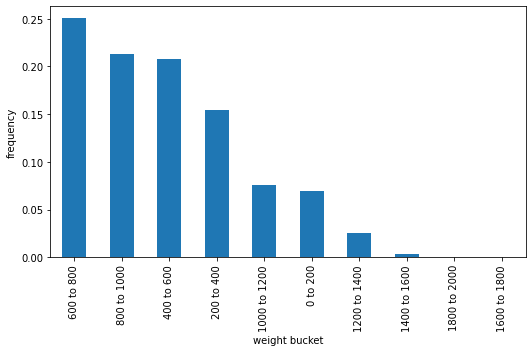

In [48]:
# Distribution of fresh weight of plants. 

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

data_7['fresh_weight_buckets'] = np.where(data_7['fresh_weight']<200, '0 to 200', 
                                 np.where(data_7['fresh_weight']<400, '200 to 400',
                                 np.where(data_7['fresh_weight']<600, '400 to 600',
                                 np.where(data_7['fresh_weight']<800, '600 to 800',
                                 np.where(data_7['fresh_weight']<1000, '800 to 1000',
                                 np.where(data_7['fresh_weight']<1200, '1000 to 1200',
                                 np.where(data_7['fresh_weight']<1400, '1200 to 1400',
                                 np.where(data_7['fresh_weight']<1600, '1400 to 1600',
                                 np.where(data_7['fresh_weight']<1800, '1600 to 1800',
                                 np.where(data_7['fresh_weight']<2000, '1800 to 2000','0'
                                         ))))))))))



data_7['fresh_weight_buckets'].value_counts(normalize=True).plot(ax=ax, kind='bar', xlabel='weight bucket', ylabel='frequency')

plt.show()

# Nearly 84% of the plants have a weight of between 200 grams to 1000 grams, with nearly 21% of plants
# having weights in each of these buckets :'400-600gm','800-1000 gm'
# 25% of the plants weigh between 600 to 800gm. 15% of plants weigh between 200-400 gm.

In [56]:
# Distribution of polar diameter

df = data_7['polar_diameter']
print(df.quantile([0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,1]))
print(df.mean())


0.00      0.0
0.10     63.6
0.20     84.0
0.25     90.0
0.30     98.0
0.40    110.0
0.50    118.0
0.60    125.0
0.70    130.0
0.75    132.0
0.80    135.0
0.90    143.0
1.00    178.0
Name: polar_diameter, dtype: float64
109.94067796610169


C:\Users\tk21374\AppData\Local\Temp/ipykernel_7948/2099800148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['polar_buckets'] = np.where(data_7['polar_diameter']<20, '0 to 20',


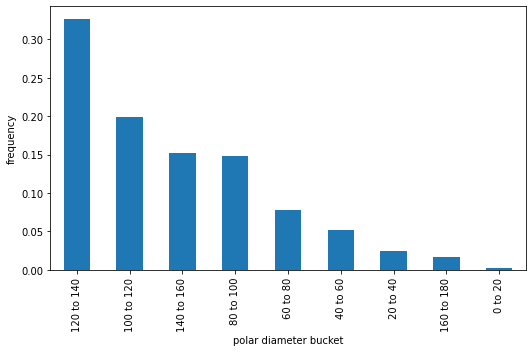

In [49]:
# Distribution of polar diameter of plants. 

plt.rcParams["figure.figsize"] = [7.50,5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

data_7['polar_buckets'] = np.where(data_7['polar_diameter']<20, '0 to 20', 
                          np.where(data_7['polar_diameter']<40, '20 to 40',
                          np.where(data_7['polar_diameter']<60, '40 to 60',
                          np.where(data_7['polar_diameter']<80, '60 to 80',
                          np.where(data_7['polar_diameter']<100, '80 to 100',
                          np.where(data_7['polar_diameter']<120, '100 to 120',
                          np.where(data_7['polar_diameter']<140, '120 to 140',
                          np.where(data_7['polar_diameter']<160, '140 to 160',
                          np.where(data_7['polar_diameter']<180, '160 to 180',
                          np.where(data_7['polar_diameter']<200, '180 to 200','0'
                                         ))))))))))



data_7['polar_buckets'].value_counts(normalize=True).plot(ax=ax, kind='bar', xlabel='polar diameter bucket', ylabel='frequency')

plt.show()

# Nearly one-third of the plants have a polar diameter of between 120 to 140 mm, with nearly 85% of plants
# have a polar diameter of 80-160 mm

In [54]:
# Distribution of radial diameter

df = data_7['radial_diameter']
print(df.quantile([0,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,1]))
print(df.mean())


0.00      0.0
0.10     60.0
0.20     85.0
0.25    100.0
0.30    110.0
0.40    120.4
0.50    130.0
0.60    138.0
0.70    140.0
0.75    145.0
0.80    150.0
0.90    155.0
1.00    185.0
Name: radial_diameter, dtype: float64
118.73305084745763


C:\Users\tk21374\AppData\Local\Temp/ipykernel_7948/795166944.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['radial_buckets'] = np.where(data_7['radial_diameter']<20, '0 to 20',


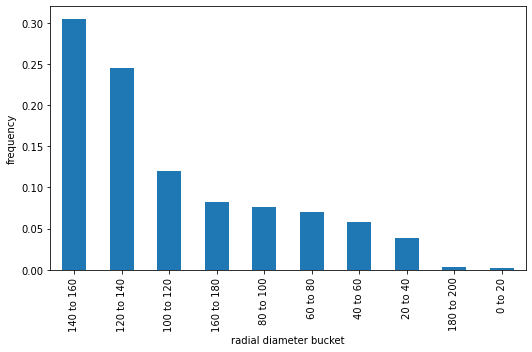

In [50]:
# Distribution of radial diameter of plants. 

plt.rcParams["figure.figsize"] = [7.50,5]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

data_7['radial_buckets'] = np.where(data_7['radial_diameter']<20, '0 to 20', 
                           np.where(data_7['radial_diameter']<40, '20 to 40',
                           np.where(data_7['radial_diameter']<60, '40 to 60',
                           np.where(data_7['radial_diameter']<80, '60 to 80',
                           np.where(data_7['radial_diameter']<100, '80 to 100',
                           np.where(data_7['radial_diameter']<120, '100 to 120',
                           np.where(data_7['radial_diameter']<140, '120 to 140',
                           np.where(data_7['radial_diameter']<160, '140 to 160',
                           np.where(data_7['radial_diameter']<180, '160 to 180',
                           np.where(data_7['radial_diameter']<200, '180 to 200','0'
                                         ))))))))))



data_7['radial_buckets'].value_counts(normalize=True).plot(ax=ax, kind='bar', xlabel='radial diameter bucket', ylabel='frequency')

plt.show()

# Nearly half of the plants have a radial diameter of between 120 to 160 mm

In [51]:
# Distribution of weight split by class
# Does weight increase with increasing class ?

data_plot = data_7[['class','fresh_weight_buckets','check_date']]

table = pd.pivot_table(data_plot, values=['check_date'], index=['fresh_weight_buckets'],
                    columns=['class'], aggfunc='count')

table


check_date                          
class                         1      2      3     4     5
fresh_weight_buckets                                     
0 to 200                   36.0   34.0   26.0  26.0  25.0
1000 to 1200               39.0   32.0   23.0  32.0  36.0
1200 to 1400                9.0    9.0   22.0   6.0   8.0
1400 to 1600                3.0    1.0    1.0   NaN   2.0
1600 to 1800                1.0    NaN    NaN   NaN   NaN
1800 to 2000                1.0    NaN    NaN   NaN   NaN
200 to 400                 60.0   69.0   57.0  70.0  71.0
400 to 600                 90.0   92.0   80.0  90.0  89.0
600 to 800                123.0  102.0  113.0  96.0  98.0
800 to 1000               105.0   89.0   83.0  88.0  87.0

In [52]:
# correlation between class and weight

data_7['class'].corr(data_7['fresh_weight'])

-0.016951818785475643

In [53]:
# Distribution of weight split by leaf area
# Does weight increase with increasing leaf area ?

data_plot = data_7[['leaf_area','fresh_weight_buckets','check_date']]

data_plot['leafarea_buckets'] = np.where(data_7['leaf_area']<200, '00 to 200', 
                                np.where(data_7['leaf_area']<400, '200 to 400',
                                np.where(data_7['leaf_area']<600, '400 to 600',
                                np.where(data_7['leaf_area']<800, '600 to 800',
                                np.where(data_7['leaf_area']<1000, '800 to 1000',
                                np.where(data_7['leaf_area']<1200, '1000 to 1200',
                                np.where(data_7['leaf_area']<1400, '1200 to 1400','0'
                                         )))))))

table = pd.pivot_table(data_plot, values=['check_date'], index=['fresh_weight_buckets'],
                    columns=['leafarea_buckets'], aggfunc='count')

table


C:\Users\tk21374\AppData\Local\Temp/ipykernel_7948/2982401704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot['leafarea_buckets'] = np.where(data_7['leaf_area']<200, '00 to 200',


check_date                                       \
leafarea_buckets      00 to 200 1000 to 1200 1200 to 1400 200 to 400   
fresh_weight_buckets                                                   
0 to 200                   25.0          NaN          NaN       39.0   
1000 to 1200                NaN          1.0          NaN       31.0   
1200 to 1400                1.0          4.0          NaN        7.0   
1400 to 1600                NaN          NaN          NaN        NaN   
1600 to 1800                NaN          NaN          NaN        1.0   
1800 to 2000                NaN          NaN          NaN        NaN   
200 to 400                 36.0          6.0          NaN      187.0   
400 to 600                 25.0         14.0          2.0      188.0   
600 to 800                 11.0          1.0          NaN      190.0   
800 to 1000                 1.0          8.0          NaN       83.0   

                                                        
leafarea_buckets     400 to 600 600 to 800 800 to 1000  
fresh_weight_buckets                                    
0 to 200                   49.0       33.0         1.0  
1000 to 1200               70.0       51.0         9.0  
1200 to 1400               15.0       21.0         6.0  
1400 to 1600                2.0        5.0         NaN  
1600 to 1800                NaN        NaN         NaN  
1800 to 2000                1.0        NaN         NaN  
200 to 400                 44.0       30.0        24.0  
400 to 600                163.0       36.0        13.0  
600 to 800                224.0       90.0        16.0  
800 to 1000               224.0      107.0        29.0

In [54]:
# correlation between leaf area and weight

data_7['leaf_area'].corr(data_7['fresh_weight'])

0.29411680965112996

In [55]:
# Distribution of weight split by growth cycle (difference between check date and plant date)
# Does weight increase with increasing growth cycle ?

data_plot = data_7[['check_plant_date_diff','fresh_weight_buckets','check_date']]

data_plot['check_plant_date_diff_bucket'] = np.where(data_7['check_plant_date_diff']<35, '0 to 35', 
                                            np.where(data_7['check_plant_date_diff']<40, '35 to 40',
                                            np.where(data_7['check_plant_date_diff']<45, '40 to 45',
                                            np.where(data_7['check_plant_date_diff']<50, '45 to 50',
                                            np.where(data_7['check_plant_date_diff']<55, '50 to 55','0'
                                         )))))

table = pd.pivot_table(data_plot, values=['check_date'], index=['fresh_weight_buckets'],
                    columns=['check_plant_date_diff_bucket'], aggfunc='count')

table


C:\Users\tk21374\AppData\Local\Temp/ipykernel_7948/2357365749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot['check_plant_date_diff_bucket'] = np.where(data_7['check_plant_date_diff']<35, '0 to 35',


check_date                                    
check_plant_date_diff_bucket    0 to 35 35 to 40 40 to 45 45 to 50 50 to 55
fresh_weight_buckets                                                       
0 to 200                           31.0     67.0     45.0      4.0      NaN
1000 to 1200                        NaN      8.0     48.0     91.0     15.0
1200 to 1400                        NaN      NaN     10.0     38.0      6.0
1400 to 1600                        NaN      NaN      1.0      6.0      NaN
1600 to 1800                        NaN      NaN      NaN      1.0      NaN
1800 to 2000                        NaN      NaN      NaN      1.0      NaN
200 to 400                        143.0     67.0     84.0     29.0      4.0
400 to 600                         63.0    153.0    149.0     66.0     10.0
600 to 800                          1.0    120.0    231.0    153.0     27.0
800 to 1000                         NaN     54.0    192.0    186.0     20.0

# Creating train and test datasets

In [59]:
# features dataset 

X=data_7[['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','check_date','plant_date_final','flight_date_final','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result'
         ]]

# target dataset

y = data_7[['fresh_weight','radial_diameter','polar_diameter']]


In [60]:
print(X)

     batch_number  class  leaf_area  Region  flight_plant_date_diff  \
402           402      2      730.0       0                    19.0   
402           402      5      643.0       0                    19.0   
402           402      5      647.0       0                    19.0   
402           402      3      694.0       0                    19.0   
402           402      1      730.0       0                    19.0   
..            ...    ...        ...     ...                     ...   
693           693      4      780.0       0                    33.0   
693           693      1      834.0       0                    33.0   
693           693      2      726.0       0                    33.0   
693           693      3      769.0       0                    33.0   
693           693      3      802.0       0                    33.0   

     check_plant_date_diff  check_flight_date_diff check_date  \
402                   41.0                    22.0 2020-05-22   
402              

In [61]:
print(y)

     fresh_weight  radial_diameter  polar_diameter
402         213.0             55.0            55.0
402         179.0             40.0            40.0
402         183.0             50.0            50.0
402         176.0             40.0            40.0
402         192.0             70.0            70.0
..            ...              ...             ...
693         621.0            120.0            85.0
693         680.0            120.0            90.0
693         583.0            115.0            92.0
693         609.0            120.0            90.0
693         709.0            130.0            93.0

[2124 rows x 3 columns]


In [62]:
# create train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=12,stratify = data_7["class"])

# keep a copy as we need check dates to see how much weight to expect each day (graph to plot sum of lettuce weight vs check date for X_test dataset)

X_test_withdate = X_test 
X_test_withdate.to_csv('X_test_withdate.csv')

# drop date variables as regressor cant handle date columns

X_train =  X_train.drop(['check_date' , 'plant_date_final','flight_date_final'],axis=1)
X_test = X_test.drop(['check_date' , 'plant_date_final','flight_date_final'],axis=1)

In [63]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_test.shape[0])
print(X_test.shape[1])

print(y_train.shape[0])
print(y_train.shape[1])
print(y_test.shape[0])
print(y_test.shape[1])

X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

1699
85
425
85
1699
3
425
3


# Random Forest Regressor

In [64]:
# random forest model

clf = MultiOutputRegressor(RandomForestRegressor(max_depth=5, bootstrap = True, max_features= 'auto',n_estimators = 100,min_samples_leaf = 3,min_samples_split = 10,random_state=0))
clf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=5,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     random_state=0))

In [65]:
clf.score(X_test, y_test, sample_weight=None)

0.8099156769408675

In [66]:
clf_grid = MultiOutputRegressor(RandomForestRegressor())

In [67]:
# cross validation

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=5)
n_scores = cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)

print('MAE: %.3f' % (mean(n_scores)))

MAE: 40.115


In [65]:
# create a grid of parameters 

random_grid = {'estimator__n_estimators':[100,150,200],
               'estimator__max_features': ['sqrt','auto'],
               'estimator__max_depth': [3,4,5]}

In [66]:
# search for the best parameters

rf_grid = GridSearchCV(clf_grid,  random_grid, cv = 3)

rf_grid = rf_grid.fit(X_train, y_train)


In [67]:
rf_grid.best_params_

{'estimator__max_depth': 5,
 'estimator__max_features': 'auto',
 'estimator__n_estimators': 150}

In [68]:
rf_grid.score(X_test, y_test)

0.811291903336746

In [78]:
# Use dummy regressor to compare

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [79]:
# check performance of dummy regressor 

dummy_regressor.score(X_train, y_train)

-1.1102230246251565e-15

In [69]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=5)
n_scores = cross_val_score(rf_grid, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)

print('MAE: %.3f' % (mean(n_scores)))

MAE: 40.100


In [73]:
# predict on test data

ypred_rf = clf.predict(X_test)
ypred_rf = pd.DataFrame(ypred_rf)
print(ypred_rf)


ypred_rf = ypred_rf.reset_index(drop=True)
ypred_rf.to_csv('ypred_rf.csv')
X_test_withdate = X_test_withdate.reset_index(drop=True)
X_test_withdate.to_csv('X_test_withdate.csv')

# merge the predictions with input variables

rf_merged = pd.concat([X_test_withdate,ypred_rf],axis=1,ignore_index=True)


rf_merged = rf_merged.rename(columns={0:'batch_number',	1:'class',	2:'leaf_area',	3:'Region',	4:'flight_plant_date_diff',	5:'check_plant_date_diff',	6:'check_flight_date_diff',	7:'check_date',	8:'plant_date_final',	9:'flight_date_final',	10:'mean_solar_radiation',	11:'mean_precipitation',	12:'mean_wind_speed_avg',	13:'mean_wind_speed_max',	14:'mean_battery_voltage',	15:'mean_leaf_wetness',	16:'mean_air_temp_avg',	17:'mean_air_temp_max',	18:'mean_air_temp_min',	19:'mean_relative_humidity',	20:'mean_dew_point_avg',	21:'mean_dew_point_min',	22:'mean_eto_result',	23:'median_solar_radiation',	24:'median_precipitation',	25:'median_wind_speed_avg',	26:'median_wind_speed_max',	27:'median_battery_voltage',	28:'median_leaf_wetness',	29:'median_air_temp_avg',	30:'median_air_temp_max',	31:'median_air_temp_min',	32:'median_relative_humidity',	33:'median_dew_point_avg',	34:'median_dew_point_min',	35:'median_eto_result',	36:'mean_2019_solar_radiation',	37:'mean_2019_precipitation',	38:'mean_2019_wind_speed_avg',	39:'mean_2019_wind_speed_max',	40:'mean_2019_battery_voltage',	41:'mean_2019_leaf_wetness',	42:'mean_2019_air_temp_avg',	43:'mean_2019_air_temp_max',	44:'mean_2019_air_temp_min',	45:'mean_2019_relative_humidity',	46:'mean_2019_dew_point_avg',	47:'mean_2019_dew_point_min',	48:'mean_2019_eto_result',	49:'median_2019_solar_radiation',	50:'median_2019_precipitation',	51:'median_2019_wind_speed_avg',	52:'median_2019_wind_speed_max',	53:'median_2019_battery_voltage',	54:'median_2019_leaf_wetness',	55:'median_2019_air_temp_avg',	56:'median_2019_air_temp_max',	57:'median_2019_air_temp_min',	58:'median_2019_relative_humidity',	59:'median_2019_dew_point_avg',	60:'median_2019_dew_point_min',	61:'median_2019_eto_result',	62:'mean_2_2019_solar_radiation',	63:'mean_2_2019_precipitation',	64:'mean_2_2019_wind_speed_avg',	65:'mean_2_2019_wind_speed_max',	66:'mean_2_2019_battery_voltage',	67:'mean_2_2019_leaf_wetness',	68:'mean_2_2019_air_temp_avg',	69:'mean_2_2019_air_temp_max',	70:'mean_2_2019_air_temp_min',	71:'mean_2_2019_relative_humidity',	72:'mean_2_2019_dew_point_avg',	73:'mean_2_2019_dew_point_min',	74:'mean_2_2019_eto_result',	75:'median_2_2019_solar_radiation',	76:'median_2_2019_precipitation',	77:'median_2_2019_wind_speed_avg',	78:'median_2_2019_wind_speed_max',	79:'median_2_2019_battery_voltage',	80:'median_2_2019_leaf_wetness',	81:'median_2_2019_air_temp_avg',	82:'median_2_2019_air_temp_max',	83:'median_2_2019_air_temp_min',	84:'median_2_2019_relative_humidity',	85:'median_2_2019_dew_point_avg',	86:'median_2_2019_dew_point_min',	87:'median_2_2019_eto_result',
                                      88:'fresh_weight',	89:'radial_diameter',	90:'polar_diameter'
})
print(rf_merged)
rf_merged.to_csv('rf_merged.csv')

               0           1           2
0     318.468167   63.071862   57.592844
1     982.088329  147.500049  136.139756
2     723.862763  147.436573  133.591235
3    1212.662489  148.095144  136.514061
4     746.615747  145.997394  136.635602
..           ...         ...         ...
420   737.617573  146.139581  136.599753
421   805.381162  147.295469  136.525487
422  1059.520409  139.068782  123.356836
423   609.718251  124.560308  114.765592
424  1032.474123  148.095144  136.514061

[425 rows x 3 columns]
     batch_number  class  leaf_area  Region  flight_plant_date_diff  \
0             589      4      306.0       0                     8.0   
1             517      1      550.0       0                    33.0   
2             647      1      394.0       0                    37.0   
3             511      4      671.0       0                    41.0   
4             521      3      450.0       0                    16.0   
..            ...    ...        ...     ...               

In [75]:
# Analyse the predictions : How much lettuce is expected each day ??


rf_merged_1 = rf_merged[['check_date','fresh_weight']]
rf_merged_2 = rf_merged_1.groupby(['check_date'],sort=True).sum()
rf_merged_2 = rf_merged_2.sort_values(by=['check_date'])


rf_merged_1 = rf_merged[['check_date']]
rf_merged_1['check_date_copy'] = rf_merged_1['check_date']
rf_merged_3 = rf_merged_1.groupby(['check_date_copy'],sort=True).max()
rf_merged_3 = rf_merged_3.sort_values(by=['check_date'])


rf_merged_2 = rf_merged_2.reset_index(drop=True)
rf_merged_3 = rf_merged_3.reset_index(drop=True)

rf_merged_4 = pd.concat([rf_merged_2,rf_merged_3],axis=1,ignore_index=True)
rf_merged_4 = rf_merged_4.rename(columns={0:'sum_fresh_weight',	1:'check_date'})
rf_merged_4 = rf_merged_4[['check_date','sum_fresh_weight']]
rf_merged_4


C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/3349895150.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_merged_1['check_date_copy'] = rf_merged_1['check_date']


,check_date,sum_fresh_weight
0,2020-05-22,2425.183385
1,2020-06-04,8789.542323
2,2020-06-08,723.989056
3,2020-07-06,14964.324840
4,2020-07-07,11749.103613
5,2020-07-08,5001.189008
6,2020-07-09,3392.538172
7,2020-07-15,7884.419887
8,2020-07-16,19548.713429
9,2020-07-17,2645.901840


In [89]:
# Analyse the predictions : How much lettuce is expected each month ??


rf_merged_1 = rf_merged[['check_date','fresh_weight']]
rf_merged_1['month'] = pd.DatetimeIndex(rf_merged_1['check_date']).month
rf_merged_1.drop(columns = ['check_date'])
rf_merged_2 = rf_merged_1.groupby(['month'],sort=True).sum()
rf_merged_2 = rf_merged_2.sort_values(by=['month'])


rf_merged_1 = rf_merged[['check_date']]
rf_merged_1['month'] = pd.DatetimeIndex(rf_merged_1['check_date']).month
rf_merged_1['month_copy'] = rf_merged_1['month']
rf_merged_1.drop(columns = ['check_date'])
rf_merged_0 = rf_merged_1[['month','month_copy']]
rf_merged_3 = rf_merged_0.groupby(['month_copy'],sort=True).max()
rf_merged_3 = rf_merged_3.sort_values(by=['month'])


rf_merged_2 = rf_merged_2.reset_index(drop=True)
rf_merged_3 = rf_merged_3.reset_index(drop=True)
rf_merged_4 = pd.concat([rf_merged_2,rf_merged_3],axis=1,ignore_index=True)
rf_merged_4 = rf_merged_4.rename(columns={0:'sum_fresh_weight',	1:'month'})
rf_merged_4 = rf_merged_4[['month','sum_fresh_weight']]
rf_merged_4

C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/941165163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_merged_1['month'] = pd.DatetimeIndex(rf_merged_1['check_date']).month
C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/941165163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_merged_1['month'] = pd.DatetimeIndex(rf_merged_1['check_date']).month
C:\Users\tk21374\AppData\Local\Temp/ipykernel_4496/941165163.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,month,sum_fresh_weight
0,5,2425.183385
1,6,9513.531379
2,7,109127.530077
3,8,96730.095974
4,9,62768.790922


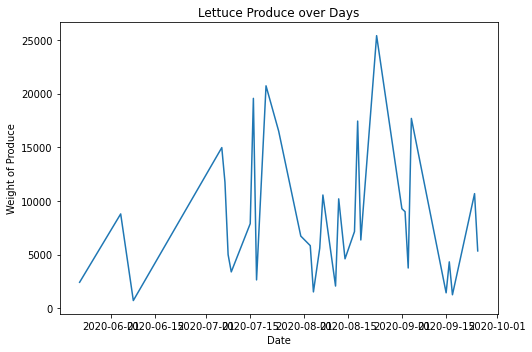

In [72]:
# plot of expected lettuce produce over coming days

plt.plot(rf_merged_4['check_date'],rf_merged_4['sum_fresh_weight'])
plt.rcParams["figure.figsize"] = [100,5]
plt.title('Lettuce Produce over Days')
plt.xlabel('Date')
plt.ylabel('Weight of Produce')
plt.show()

In [73]:
# Which region has highest weight of lettuce ?

rf_merged_1 = rf_merged[['Region','fresh_weight']]
rf_merged_2 = rf_merged_1.groupby(['Region'],sort=True).sum()
rf_merged_2

# Since the test data has only one single region, we cant compare weight of produce across different regions.
# With real data we can check for average weight per plant to see which region has highest weight per plant

,fresh_weight
Region,
0,280565.131738


In [74]:
# how many plants were planted in each region ?

rf_merged_1 = rf_merged[['Region','fresh_weight']]
rf_merged_2 = rf_merged_1.groupby(['Region'],sort=True).count()
rf_merged_2

# we can take average produce for each region (which is total produce divided by number of plants) and see which region has 
# highest weight per plant. More plants can be planted here as the produce is better than other regions.Weather conditions of 
# this region can be suitable for plants which is resulting in better produce

,fresh_weight
Region,
0,425


In [75]:
# Check feature importances for fresh weight

features_fresh_weight = clf.estimators_[0].feature_importances_
column_names =['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result']
fresh_weight_col = pd.DataFrame(columns=['feat', 'colname'])

fresh_weight_col['feat'] = features_fresh_weight
fresh_weight_col['colname']='0'
for i in range(len(column_names)):
    fresh_weight_col['colname'].iloc[i] = column_names[i]



fresh_weight_col = fresh_weight_col[['colname','feat']]

pd.set_option('display.max_rows', 100)
print(fresh_weight_col.sort_values(by=['feat'], ascending=False))

                            colname      feat
5             check_plant_date_diff  0.429295
2                         leaf_area  0.185498
34          mean_2019_precipitation  0.088648
10              mean_wind_speed_max  0.070591
9               mean_wind_speed_avg  0.043301
63      mean_2_2019_battery_voltage  0.013061
60        mean_2_2019_precipitation  0.012361
71           mean_2_2019_eto_result  0.010850
49       median_2019_wind_speed_max  0.009626
64         mean_2_2019_leaf_wetness  0.009576
44          mean_2019_dew_point_min  0.009389
16           mean_relative_humidity  0.007977
79       median_2_2019_air_temp_max  0.007682
38           mean_2019_leaf_wetness  0.006877
22            median_wind_speed_avg  0.006697
36         mean_2019_wind_speed_max  0.006665
0                      batch_number  0.005767
42      mean_2019_relative_humidity  0.004025
35         mean_2019_wind_speed_avg  0.003808
15                mean_air_temp_min  0.003793
6            check_flight_date_dif

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
# Check feature importances for radial diameter

features_fresh_weight =clf.estimators_[1].feature_importances_
column_names =['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result']
fresh_weight_col = pd.DataFrame(columns=['feat', 'colname'])

fresh_weight_col['feat'] = features_fresh_weight
fresh_weight_col['colname']='0'
for i in range(len(column_names)):
    fresh_weight_col['colname'].iloc[i] = column_names[i]



fresh_weight_col = fresh_weight_col[['colname','feat']]

pd.set_option('display.max_rows', 100)
print(fresh_weight_col.sort_values(by=['feat'], ascending=False))

                            colname      feat
5             check_plant_date_diff  0.511842
67         mean_2_2019_air_temp_min  0.222744
2                         leaf_area  0.105113
34          mean_2019_precipitation  0.043612
16           mean_relative_humidity  0.010536
0                      batch_number  0.009045
71           mean_2_2019_eto_result  0.009020
49       median_2019_wind_speed_max  0.008989
4            flight_plant_date_diff  0.008409
20           median_solar_radiation  0.007171
29         median_relative_humidity  0.005967
60        mean_2_2019_precipitation  0.004388
13                mean_air_temp_avg  0.003357
12                mean_leaf_wetness  0.003295
68    mean_2_2019_relative_humidity  0.002754
66         mean_2_2019_air_temp_max  0.002684
59      mean_2_2019_solar_radiation  0.002601
15                mean_air_temp_min  0.001896
18               mean_dew_point_min  0.001815
37        mean_2019_battery_voltage  0.001478
9               mean_wind_speed_av

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [77]:
# Check feature importances for polar diameter

features_fresh_weight = clf.estimators_[2].feature_importances_
column_names =['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result']
fresh_weight_col = pd.DataFrame(columns=['feat', 'colname'])

fresh_weight_col['feat'] = features_fresh_weight
fresh_weight_col['colname']='0'
for i in range(len(column_names)):
    fresh_weight_col['colname'].iloc[i] = column_names[i]



fresh_weight_col = fresh_weight_col[['colname','feat']]

pd.set_option('display.max_rows', 100)
print(fresh_weight_col.sort_values(by=['feat'], ascending=False))

                            colname      feat
34          mean_2019_precipitation  0.253942
5             check_plant_date_diff  0.211449
9               mean_wind_speed_avg  0.136536
22            median_wind_speed_avg  0.129944
2                         leaf_area  0.080878
0                      batch_number  0.025691
74     median_2_2019_wind_speed_avg  0.023645
10              mean_wind_speed_max  0.015655
64         mean_2_2019_leaf_wetness  0.010266
76    median_2_2019_battery_voltage  0.009592
31             median_dew_point_min  0.007634
84         median_2_2019_eto_result  0.006964
17               mean_dew_point_avg  0.006108
79       median_2_2019_air_temp_max  0.005978
60        mean_2_2019_precipitation  0.005820
14                mean_air_temp_max  0.004028
42      mean_2019_relative_humidity  0.003808
63      mean_2_2019_battery_voltage  0.003460
71           mean_2_2019_eto_result  0.003172
20           median_solar_radiation  0.003028
81  median_2_2019_relative_humidit

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Gradient Boosting Regressor

In [80]:
clf = MultiOutputRegressor(GradientBoostingRegressor(max_depth=5, max_features= 'auto',n_estimators = 100,min_samples_leaf = 3,min_samples_split = 10,random_state=0))
clf.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=5,
                                                         max_features='auto',
                                                         min_samples_leaf=3,
                                                         min_samples_split=10,
                                                         random_state=0))

In [81]:
clf.score(X_test, y_test, sample_weight=None)

0.8642507759559818

In [82]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=5)
n_scores = cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)

print('MSE: %.3f' % (mean(n_scores)))

MSE: 31.460


In [83]:
ypred = clf.predict(X_test)
print(ypred)

[[ 305.2933351    69.68659116   63.03520408]
 [ 971.99436201  155.58846235  135.69587392]
 [ 722.56354632  147.97507435  132.93809641]
 ...
 [1316.60143436  153.03091914  133.44919917]
 [ 638.46172888  135.36468478  123.4790966 ]
 [1025.84327897  165.64278528  145.65341092]]


In [84]:
clf_grid = MultiOutputRegressor(GradientBoostingRegressor())

In [85]:
random_grid = {'estimator__n_estimators':[100,150,200],
               'estimator__max_features': ['sqrt','auto'],
               'estimator__max_depth': [3,4,5]}

In [86]:
xgb_grid = GridSearchCV(clf_grid,  random_grid, cv = 3)

xgb_grid = xgb_grid.fit(X_train, y_train)


In [87]:
xgb_grid.best_params_

{'estimator__max_depth': 4,
 'estimator__max_features': 'auto',
 'estimator__n_estimators': 100}

In [88]:
xgb_grid.score(X_test, y_test)

0.8664239883415022

In [89]:
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=5)
n_scores = cross_val_score(xgb_grid, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)

print('MSE: %.3f' % (mean(n_scores)))

MSE: 31.581


In [90]:
# predict on test data

ypred_rf = clf.predict(X_test)
ypred_rf = pd.DataFrame(ypred_rf)
print(ypred_rf)


ypred_rf = ypred_rf.reset_index(drop=True)
ypred_rf.to_csv('ypred_rf.csv')
X_test_withdate = X_test_withdate.reset_index(drop=True)
X_test_withdate.to_csv('X_test_withdate.csv')

# merge the predictions with input variables

rf_merged = pd.concat([X_test_withdate,ypred_rf],axis=1,ignore_index=True)


rf_merged = rf_merged.rename(columns={0:'batch_number',	1:'class',	2:'leaf_area',	3:'Region',	4:'flight_plant_date_diff',	5:'check_plant_date_diff',	6:'check_flight_date_diff',	7:'check_date',	8:'plant_date_final',	9:'flight_date_final',	10:'mean_solar_radiation',	11:'mean_precipitation',	12:'mean_wind_speed_avg',	13:'mean_wind_speed_max',	14:'mean_battery_voltage',	15:'mean_leaf_wetness',	16:'mean_air_temp_avg',	17:'mean_air_temp_max',	18:'mean_air_temp_min',	19:'mean_relative_humidity',	20:'mean_dew_point_avg',	21:'mean_dew_point_min',	22:'mean_eto_result',	23:'median_solar_radiation',	24:'median_precipitation',	25:'median_wind_speed_avg',	26:'median_wind_speed_max',	27:'median_battery_voltage',	28:'median_leaf_wetness',	29:'median_air_temp_avg',	30:'median_air_temp_max',	31:'median_air_temp_min',	32:'median_relative_humidity',	33:'median_dew_point_avg',	34:'median_dew_point_min',	35:'median_eto_result',	36:'mean_2019_solar_radiation',	37:'mean_2019_precipitation',	38:'mean_2019_wind_speed_avg',	39:'mean_2019_wind_speed_max',	40:'mean_2019_battery_voltage',	41:'mean_2019_leaf_wetness',	42:'mean_2019_air_temp_avg',	43:'mean_2019_air_temp_max',	44:'mean_2019_air_temp_min',	45:'mean_2019_relative_humidity',	46:'mean_2019_dew_point_avg',	47:'mean_2019_dew_point_min',	48:'mean_2019_eto_result',	49:'median_2019_solar_radiation',	50:'median_2019_precipitation',	51:'median_2019_wind_speed_avg',	52:'median_2019_wind_speed_max',	53:'median_2019_battery_voltage',	54:'median_2019_leaf_wetness',	55:'median_2019_air_temp_avg',	56:'median_2019_air_temp_max',	57:'median_2019_air_temp_min',	58:'median_2019_relative_humidity',	59:'median_2019_dew_point_avg',	60:'median_2019_dew_point_min',	61:'median_2019_eto_result',	62:'mean_2_2019_solar_radiation',	63:'mean_2_2019_precipitation',	64:'mean_2_2019_wind_speed_avg',	65:'mean_2_2019_wind_speed_max',	66:'mean_2_2019_battery_voltage',	67:'mean_2_2019_leaf_wetness',	68:'mean_2_2019_air_temp_avg',	69:'mean_2_2019_air_temp_max',	70:'mean_2_2019_air_temp_min',	71:'mean_2_2019_relative_humidity',	72:'mean_2_2019_dew_point_avg',	73:'mean_2_2019_dew_point_min',	74:'mean_2_2019_eto_result',	75:'median_2_2019_solar_radiation',	76:'median_2_2019_precipitation',	77:'median_2_2019_wind_speed_avg',	78:'median_2_2019_wind_speed_max',	79:'median_2_2019_battery_voltage',	80:'median_2_2019_leaf_wetness',	81:'median_2_2019_air_temp_avg',	82:'median_2_2019_air_temp_max',	83:'median_2_2019_air_temp_min',	84:'median_2_2019_relative_humidity',	85:'median_2_2019_dew_point_avg',	86:'median_2_2019_dew_point_min',	87:'median_2_2019_eto_result',
                                      88:'fresh_weight',	89:'radial_diameter',	90:'polar_diameter'
})
print(rf_merged)
rf_merged.to_csv('rf_merged.csv')

               0           1           2
0     305.293335   69.686591   63.035204
1     971.994362  155.588462  135.695874
2     722.563546  147.975074  132.938096
3    1309.914522  173.832163  154.468257
4     856.423316  154.564603  139.671410
..           ...         ...         ...
420   799.088561  138.439657  135.315828
421   797.557114  149.138982  142.525878
422  1316.601434  153.030919  133.449199
423   638.461729  135.364685  123.479097
424  1025.843279  165.642785  145.653411

[425 rows x 3 columns]
     batch_number  class  leaf_area  Region  flight_plant_date_diff  \
0             589      4      306.0       0                     8.0   
1             517      1      550.0       0                    33.0   
2             647      1      394.0       0                    37.0   
3             511      4      671.0       0                    41.0   
4             521      3      450.0       0                    16.0   
..            ...    ...        ...     ...               

In [91]:
# Analyse the predictions

rf_merged_1 = rf_merged[['check_date','fresh_weight']]
rf_merged_2 = rf_merged_1.groupby(['check_date'],sort=True).sum()
rf_merged_2 = rf_merged_2.sort_values(by=['check_date'])


rf_merged_1 = rf_merged[['check_date']]
rf_merged_1['check_date_copy'] = rf_merged_1['check_date']
rf_merged_3 = rf_merged_1.groupby(['check_date_copy'],sort=True).max()
rf_merged_3 = rf_merged_3.sort_values(by=['check_date'])


rf_merged_2 = rf_merged_2.reset_index(drop=True)
rf_merged_3 = rf_merged_3.reset_index(drop=True)

rf_merged_4 = pd.concat([rf_merged_2,rf_merged_3],axis=1,ignore_index=True)
rf_merged_4 = rf_merged_4.rename(columns={0:'sum_fresh_weight',	1:'check_date'})
rf_merged_4 = rf_merged_4[['check_date','sum_fresh_weight']]
rf_merged_4


C:\Users\tk21374\AppData\Local\Temp/ipykernel_7948/1113909738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_merged_1['check_date_copy'] = rf_merged_1['check_date']


,check_date,sum_fresh_weight
0,2020-05-22,2247.017989
1,2020-06-04,9024.712300
2,2020-06-08,797.439777
3,2020-07-06,14505.490624
4,2020-07-07,11531.919825
5,2020-07-08,4285.927863
6,2020-07-09,3178.449285
7,2020-07-15,8167.247618
8,2020-07-16,20645.556233
9,2020-07-17,2244.782728


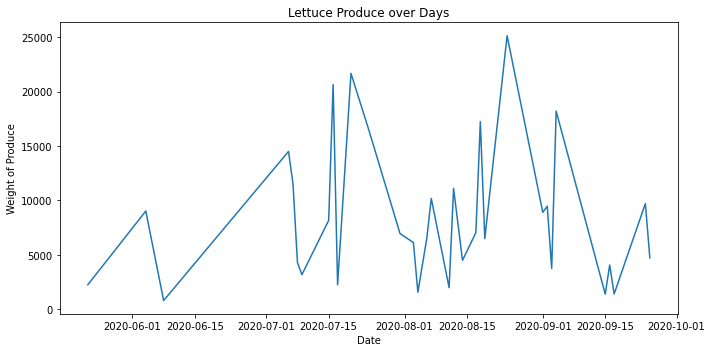

In [101]:
# plot of expected lettuce produce over coming days

plt.plot(rf_merged_4['check_date'],rf_merged_4['sum_fresh_weight'])
plt.rcParams["figure.figsize"] = [100,5]
plt.title('Lettuce Produce over Days')
plt.xlabel('Date')
plt.ylabel('Weight of Produce')
plt.show()

In [93]:
# Which region has highest weight of lettuce ?

rf_merged_1 = rf_merged[['Region','fresh_weight']]
rf_merged_2 = rf_merged_1.groupby(['Region'],sort=True).sum()
rf_merged_2

# Since the test data has only one single region, we cant compare weight of produce across different regions.

,fresh_weight
Region,
0,281293.204169


In [94]:
# how many plants were planted in each region ?

rf_merged_1 = rf_merged[['Region','fresh_weight']]
rf_merged_2 = rf_merged_1.groupby(['Region'],sort=True).count()
rf_merged_2

# we can take average produce for each region (which is total produce divided by number of plants) and see which region has 
# highest weight per plant. More plants can be planted here as the produce is better than other regions.Weather conditions of 
# this region can be suitable for plants which is resulting in better produce

,fresh_weight
Region,
0,425


In [95]:
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [96]:
dummy_regressor.score(X_train, y_train)

-1.1102230246251565e-15

In [97]:
# Check feature importances for fresh weight

features_fresh_weight = clf.estimators_[0].feature_importances_
column_names =['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result']
fresh_weight_col = pd.DataFrame(columns=['feat', 'colname'])

fresh_weight_col['feat'] = features_fresh_weight
fresh_weight_col['colname']='0'
for i in range(len(column_names)):
    fresh_weight_col['colname'].iloc[i] = column_names[i]



fresh_weight_col = fresh_weight_col[['colname','feat']]

pd.set_option('display.max_rows', 100)
print(fresh_weight_col.sort_values(by=['feat'], ascending=False))

                            colname      feat
5             check_plant_date_diff  0.370240
2                         leaf_area  0.233541
10              mean_wind_speed_max  0.113763
9               mean_wind_speed_avg  0.040639
60        mean_2_2019_precipitation  0.017733
34          mean_2019_precipitation  0.015907
36         mean_2019_wind_speed_max  0.014935
0                      batch_number  0.013500
22            median_wind_speed_avg  0.011904
63      mean_2_2019_battery_voltage  0.011499
59      mean_2_2019_solar_radiation  0.008231
49       median_2019_wind_speed_max  0.007795
71           mean_2_2019_eto_result  0.007240
57        median_2019_dew_point_min  0.007206
19                  mean_eto_result  0.007070
44          mean_2019_dew_point_min  0.006634
79       median_2_2019_air_temp_max  0.006554
33        mean_2019_solar_radiation  0.006299
8                mean_precipitation  0.005953
84         median_2_2019_eto_result  0.005906
64         mean_2_2019_leaf_wetnes

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
# Check feature importances for radial diameter

features_fresh_weight = clf.estimators_[1].feature_importances_
column_names =['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result']
fresh_weight_col = pd.DataFrame(columns=['feat', 'colname'])

fresh_weight_col['feat'] = features_fresh_weight
fresh_weight_col['colname']='0'
for i in range(len(column_names)):
    fresh_weight_col['colname'].iloc[i] = column_names[i]



fresh_weight_col = fresh_weight_col[['colname','feat']]

pd.set_option('display.max_rows', 100)
print(fresh_weight_col.sort_values(by=['feat'], ascending=False))

                            colname      feat
5             check_plant_date_diff  0.466186
67         mean_2_2019_air_temp_min  0.180952
2                         leaf_area  0.141467
34          mean_2019_precipitation  0.027977
29         median_relative_humidity  0.014940
9               mean_wind_speed_avg  0.012494
20           median_solar_radiation  0.009998
19                  mean_eto_result  0.009803
22            median_wind_speed_avg  0.008768
18               mean_dew_point_min  0.008511
71           mean_2_2019_eto_result  0.008200
49       median_2019_wind_speed_max  0.007879
13                mean_air_temp_avg  0.007271
0                      batch_number  0.007031
60        mean_2_2019_precipitation  0.006934
10              mean_wind_speed_max  0.005039
4            flight_plant_date_diff  0.004259
64         mean_2_2019_leaf_wetness  0.004187
12                mean_leaf_wetness  0.004160
70        mean_2_2019_dew_point_min  0.004008
66         mean_2_2019_air_temp_ma

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [99]:
# Check feature importances for polar diameter

features_fresh_weight = clf.estimators_[2].feature_importances_
column_names =['batch_number','class','leaf_area','Region','flight_plant_date_diff','check_plant_date_diff','check_flight_date_diff','mean_solar_radiation','mean_precipitation','mean_wind_speed_avg','mean_wind_speed_max','mean_battery_voltage','mean_leaf_wetness','mean_air_temp_avg','mean_air_temp_max','mean_air_temp_min','mean_relative_humidity','mean_dew_point_avg','mean_dew_point_min','mean_eto_result','median_solar_radiation','median_precipitation','median_wind_speed_avg','median_wind_speed_max','median_battery_voltage','median_leaf_wetness','median_air_temp_avg','median_air_temp_max','median_air_temp_min','median_relative_humidity','median_dew_point_avg','median_dew_point_min','median_eto_result','mean_2019_solar_radiation','mean_2019_precipitation','mean_2019_wind_speed_avg','mean_2019_wind_speed_max','mean_2019_battery_voltage','mean_2019_leaf_wetness','mean_2019_air_temp_avg','mean_2019_air_temp_max','mean_2019_air_temp_min','mean_2019_relative_humidity','mean_2019_dew_point_avg','mean_2019_dew_point_min','mean_2019_eto_result','median_2019_solar_radiation','median_2019_precipitation','median_2019_wind_speed_avg','median_2019_wind_speed_max','median_2019_battery_voltage','median_2019_leaf_wetness','median_2019_air_temp_avg','median_2019_air_temp_max','median_2019_air_temp_min','median_2019_relative_humidity','median_2019_dew_point_avg','median_2019_dew_point_min','median_2019_eto_result','mean_2_2019_solar_radiation','mean_2_2019_precipitation','mean_2_2019_wind_speed_avg','mean_2_2019_wind_speed_max','mean_2_2019_battery_voltage','mean_2_2019_leaf_wetness','mean_2_2019_air_temp_avg','mean_2_2019_air_temp_max','mean_2_2019_air_temp_min','mean_2_2019_relative_humidity','mean_2_2019_dew_point_avg','mean_2_2019_dew_point_min','mean_2_2019_eto_result','median_2_2019_solar_radiation','median_2_2019_precipitation','median_2_2019_wind_speed_avg','median_2_2019_wind_speed_max','median_2_2019_battery_voltage','median_2_2019_leaf_wetness','median_2_2019_air_temp_avg','median_2_2019_air_temp_max','median_2_2019_air_temp_min','median_2_2019_relative_humidity','median_2_2019_dew_point_avg','median_2_2019_dew_point_min','median_2_2019_eto_result']
fresh_weight_col = pd.DataFrame(columns=['feat', 'colname'])

fresh_weight_col['feat'] = features_fresh_weight
fresh_weight_col['colname']='0'
for i in range(len(column_names)):
    fresh_weight_col['colname'].iloc[i] = column_names[i]



fresh_weight_col = fresh_weight_col[['colname','feat']]

pd.set_option('display.max_rows', 100)
print(fresh_weight_col.sort_values(by=['feat'], ascending=False))

                            colname      feat
34          mean_2019_precipitation  0.213448
5             check_plant_date_diff  0.207389
9               mean_wind_speed_avg  0.131746
2                         leaf_area  0.130266
22            median_wind_speed_avg  0.093186
0                      batch_number  0.025498
10              mean_wind_speed_max  0.014559
76    median_2_2019_battery_voltage  0.013908
79       median_2_2019_air_temp_max  0.011034
84         median_2_2019_eto_result  0.009896
42      mean_2019_relative_humidity  0.009455
31             median_dew_point_min  0.008773
17               mean_dew_point_avg  0.008618
74     median_2_2019_wind_speed_avg  0.008201
11             mean_battery_voltage  0.007515
19                  mean_eto_result  0.007433
71           mean_2_2019_eto_result  0.005827
1                             class  0.004996
60        mean_2_2019_precipitation  0.004955
56        median_2019_dew_point_avg  0.004920
37        mean_2019_battery_voltag

c:\python3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
